In [1]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=ab93beb7d6be9505372659aab54fca9437b75c8223598613c04a4c73a3ff1e30
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.9 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatibl

In [2]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-a8wx3dg0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-a8wx3dg0
  Resolved https://github.com/facebookresearch/detectron2.git to commit 60944b7e42f59f090e9f1d8ecdee1e43b7ceff75
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

In [3]:
import detectron2


In [4]:
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

In [5]:
from detectron2 import model_zoo


In [6]:
from detectron2.engine import DefaultTrainer,DefaultPredictor

In [7]:
from detectron2.config import get_cfg

In [8]:
from detectron2.data import MetadataCatalog,DatasetCatalog

In [9]:
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

In [10]:
setup_logger()

<Logger detectron2 (DEBUG)>

In [11]:
%cd /content/drive/MyDrive/detectron 2/data_detectron2

/content/drive/MyDrive/detectron 2/data_detectron2


In [12]:
from detectron2.data.datasets import register_coco_instances

In [13]:
register_coco_instances("CustomTrain",{},"./output.json","./train")

In [14]:
sample_metadata=MetadataCatalog.get("CustomTrain")


In [15]:
sample_metadata

namespace(name='CustomTrain',
          json_file='./output.json',
          image_root='./train',
          evaluator_type='coco')

In [16]:
database_dict=DatasetCatalog.get("CustomTrain")

[05/05 09:49:05 d2.data.datasets.coco]: Loading ./output.json takes 1.38 seconds.
WARNING [05/05 09:49:05 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/05 09:49:05 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json


In [17]:
database_dict

[{'file_name': './train/IMG_2385.JPG',
  'height': 504,
  'width': 378,
  'image_id': 'IMG_2385',
  'annotations': [{'iscrowd': 0,
    'bbox': [91, 182, 132, 166],
    'category_id': 2,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': './train/IMG_2386.JPG',
  'height': 504,
  'width': 378,
  'image_id': 'IMG_2386',
  'annotations': [{'iscrowd': 0,
    'bbox': [108, 164, 143, 180],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': './train/IMG_2388.JPG',
  'height': 504,
  'width': 378,
  'image_id': 'IMG_2388',
  'annotations': [{'iscrowd': 0,
    'bbox': [68, 219, 160, 187],
    'category_id': 2,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': './train/IMG_2389.JPG',
  'height': 504,
  'width': 378,
  'image_id': 'IMG_2389',
  'annotations': [{'iscrowd': 0,
    'bbox': [117, 204, 129, 180],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': './train/IMG_2390.JPG',
  'height': 504,
  'width': 378,
  'image_i

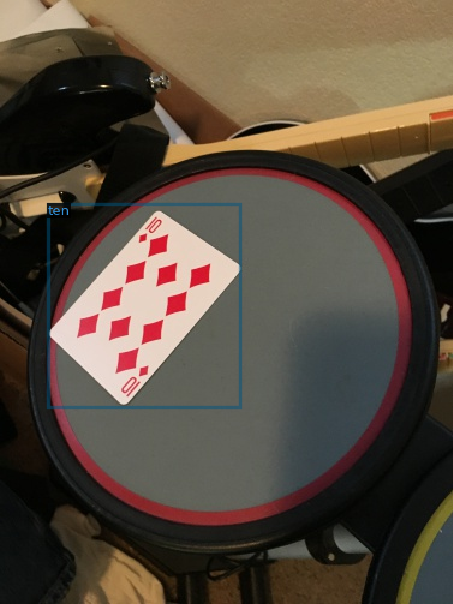

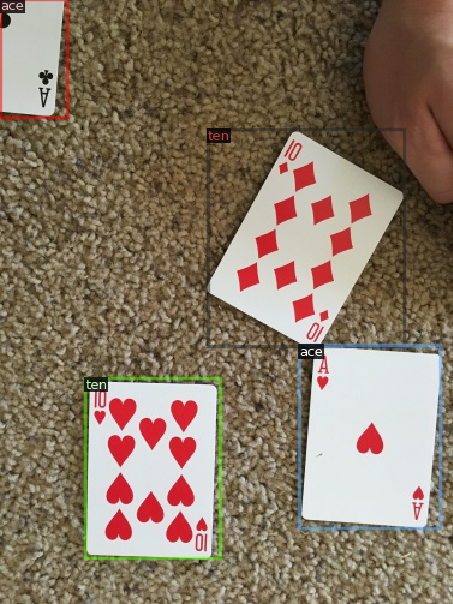

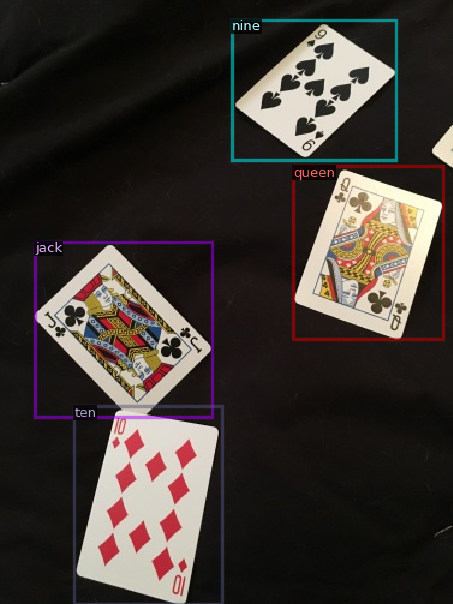

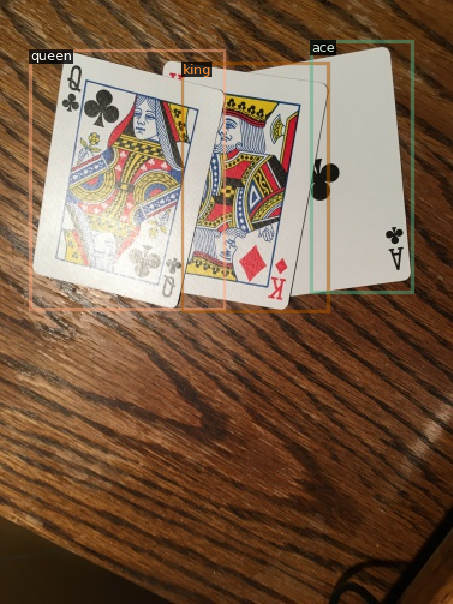

In [18]:
for file in random.sample(database_dict,4):
  img=cv2.imread(file["file_name"])
  vis=Visualizer(img[:,:,::-1],metadata=sample_metadata,scale=1.2)
  vis=vis.draw_dataset_dict(file)
  cv2_imshow(vis.get_image()[:,:,::-1])


In [19]:
len(sample_metadata.thing_classes)

6

In [20]:
cfg=get_cfg()

In [21]:
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml')) 
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml')


In [22]:

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE=128
cfg.MODEL.ROI_HEADS.NUM_CLASSES=len(sample_metadata.thing_classes)


In [23]:
cfg.DATASETS.TRAIN=("CustomTrain",)
cfg.DATASETS.TEST=()


In [24]:

cfg.SOLVER.BASE_LR=0.0025
cfg.SOLVER.IMS_PER_BATCH=2
cfg.SOLVER.MAX_ITER=300

In [25]:
cfg.DATALOADER.NUM_WORKERS=2

In [26]:
os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
trainer=DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()


[05/05 09:50:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [32]:
register_coco_instances("Custom_Test",{},"./Test_Output.json","./Test images")

In [33]:
test_sample_metadata=MetadataCatalog.get("Custom_Test")

In [34]:
test_sample_metadata

namespace(name='Custom_Test',
          json_file='./Test_Output.json',
          image_root='./Test images',
          evaluator_type='coco')

In [35]:
test_database_dict=DatasetCatalog.get("Custom_Test")

[05/05 09:56:31 d2.data.datasets.coco]: Loaded 10 images in COCO format from ./Test_Output.json


KeyError: ignored

In [61]:
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR,'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg.DATASETS.TEST=("CustomTrain",)
predictor=DefaultPredictor(cfg)


[05/05 08:17:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [62]:
from detectron2.utils.visualizer import ColorMode

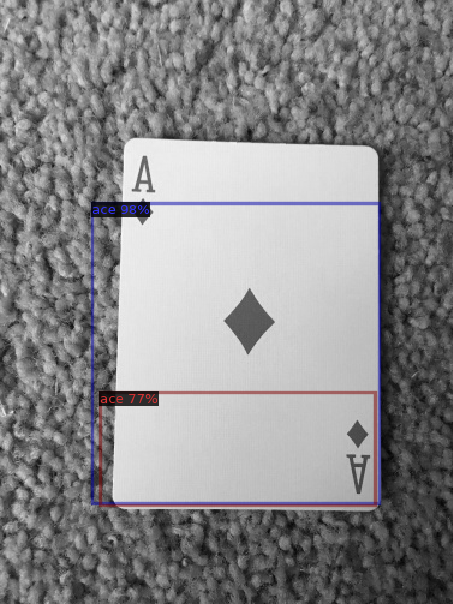

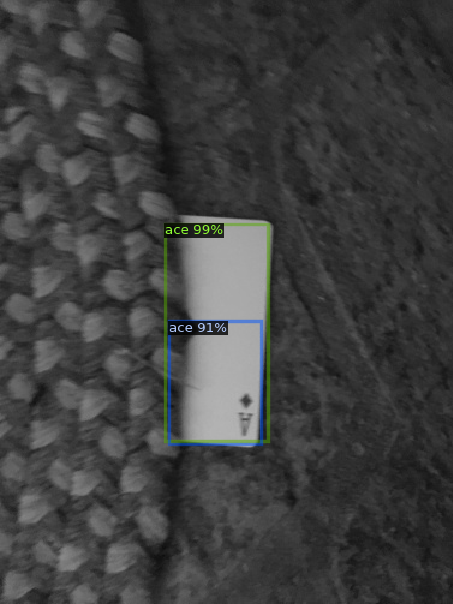

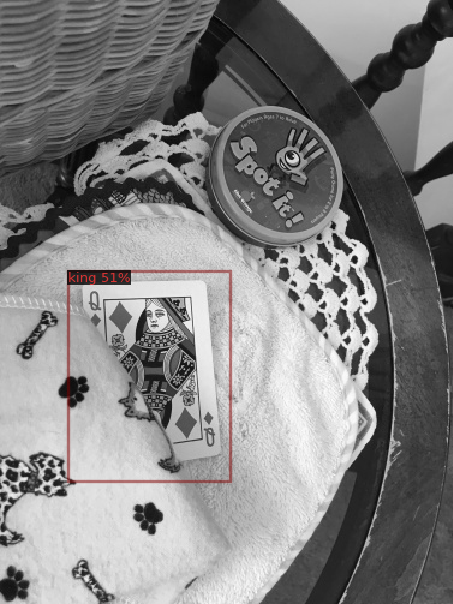

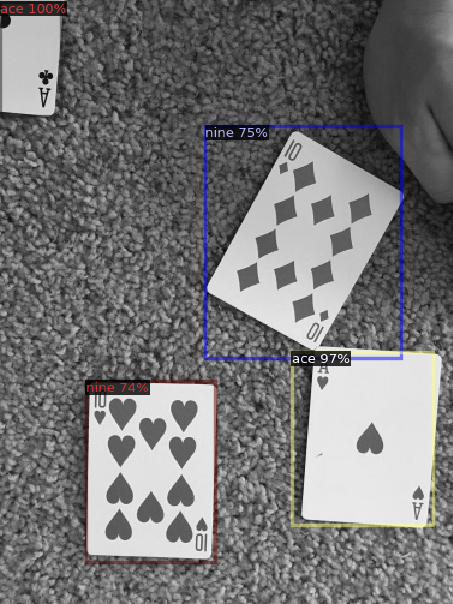

In [64]:
for file in random.sample(database_dict,4):
  img=cv2.imread(file["file_name"])
  output=predictor(img)
  v=Visualizer(img[:,:,::-1],
               metadata=sample_metadata,
               scale=1.2,
               instance_mode=ColorMode.IMAGE_BW)
  v=v.draw_instance_predictions(output["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:,:,::-1])

In [65]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("CustomTrain", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "CustomTrain")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [05/05 08:19:38 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/05 08:19:38 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json
[05/05 08:19:38 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/05 08:19:38 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/05 08:19:38 d2.data.common]: Serializing 290 elements to byte tensors and concatenating them all ...
[05/05 08:19:38 d2.data.common]: Serialized dataset takes 0.07 MiB
[05/05 08:19:38 d2.evaluation.evaluator]: Start inference on 290 batches
[05/05 08:19:39 d2.evaluation.evaluator]: Inference done 11/290. Dataloading: 0.0016 s/iter. Inference: 0.1077 s/iter. Eval: 0.0003 s/iter. Total: 0.1096 s/iter. ETA=0:00:30
[05/05 08:19:44 d2.evaluation.evaluator]: Inference do

In [66]:
pwd

'/content/drive/MyDrive/detectron 2/data_detectron2'

In [68]:
with open("config.yml","w") as f:
  f.write(cfg.dump())
  f.close()